In [15]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

Appliquez la procédure KMeans sur ce jeu de données pour obtenir 3 clusters
• Donner une visualisation graphique des villes projetées dans le plan principal. Les villes de
chaque cluster devraient avoir une couleur différente des villes des autres clusters

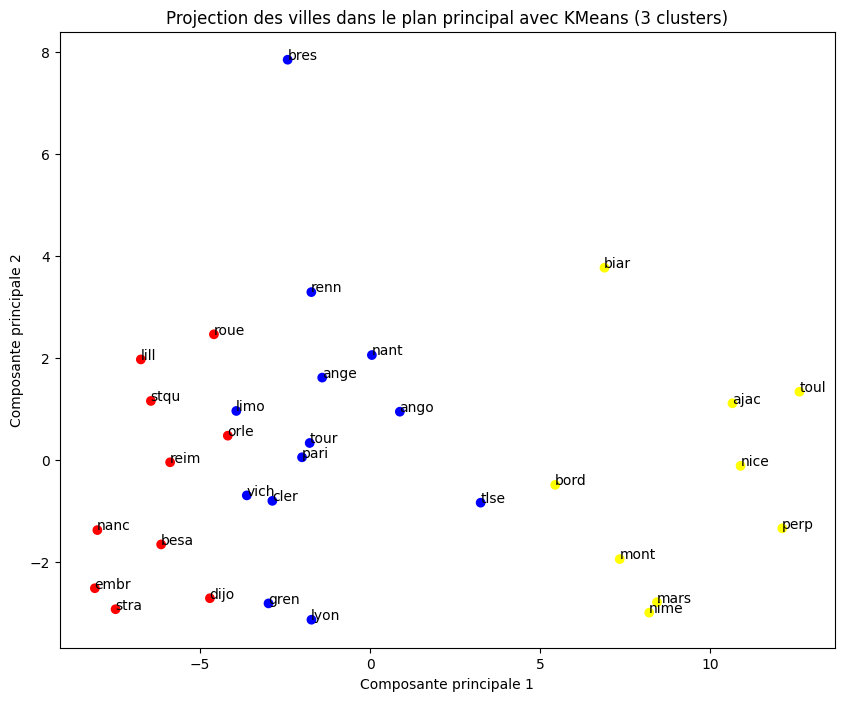

   ville  janv  fev  mars  avril   mai  juin  juil  aout  sept   oct   nov  \
0   ajac   7.7  8.7  10.5   12.6  15.9  19.8  22.0  22.2  20.3  16.3  11.8   
1   ange   4.2  4.9   7.9   10.4  13.6  17.0  18.7  18.4  16.1  11.7   7.6   
2   ango   4.6  5.4   8.9   11.3  14.5  17.2  19.5  19.4  16.9  12.5   8.1   
3   besa   1.1  2.2   6.4    9.7  13.6  16.9  18.7  18.3  15.5  10.4   5.7   
4   biar   7.6  8.0  10.8   12.0  14.7  17.8  19.7  19.9  18.5  14.8  10.9   
5   bord   5.6  6.6  10.3   12.8  15.8  19.3  20.9  21.0  18.6  13.8   9.1   
6   bres   6.1  5.8   7.8    9.2  11.6  14.4  15.6  16.0  14.7  12.0   9.0   
7   cler   2.6  3.7   7.5   10.3  13.8  17.3  19.4  19.1  16.2  11.2   6.6   
8   dijo   1.3  2.6   6.9   10.4  14.3  17.7  19.6  19.0  15.9  10.5   5.7   
9   embr   0.5  1.6   5.7    9.0  13.0  16.4  18.9  18.3  15.3  10.1   4.6   
10  gren   1.5  3.2   7.7   10.6  14.5  17.8  20.1  19.5  16.7  11.4   6.5   
11  lill   2.4  2.9   6.0    8.9  12.4  15.3  17.1  17.1  14.7  

In [16]:

import matplotlib
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Charger les données à partir du fichier CSV en spécifiant le séparateur comme ";"
data = pd.read_csv('villes.csv', sep=';')

# Sélectionner les températures comme caractéristiques pour le clustering
temperatures = data.drop(columns=["ville"])

# Appliquer l'ACP pour réduire la dimensionnalité
pca = PCA(n_components=2)
X_pca = pca.fit_transform(temperatures)

# Appliquer KMeans avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clustering = kmeans.fit_predict(X_pca)

# Définir les couleurs pour les clusters
colors = ['red', 'yellow', 'blue']

# Afficher les résultats
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))

# Ajouter les noms des villes aux points
for i, ville in enumerate(data['ville']):
    plt.annotate(ville, xy=(X_pca[i, 0], X_pca[i, 1]), xytext=(-0.2, 0.2), textcoords='offset points')

plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('Projection des villes dans le plan principal avec KMeans (3 clusters)')
plt.show()

# Afficher le DataFrame original
print(data)




```
Appliquez la procédure AgglomerativeClustering sur ce jeu de données pour obtenir trois clusters
avec différentes méthodes d’agrégation (il faut essayer ward, average et single).
• Donner à chaque fois une visualisation graphique des villes projetées dans le plan
principal. Les villes de chaque cluster devraient avoir une couleur différente des villes des
autres clusters.
```





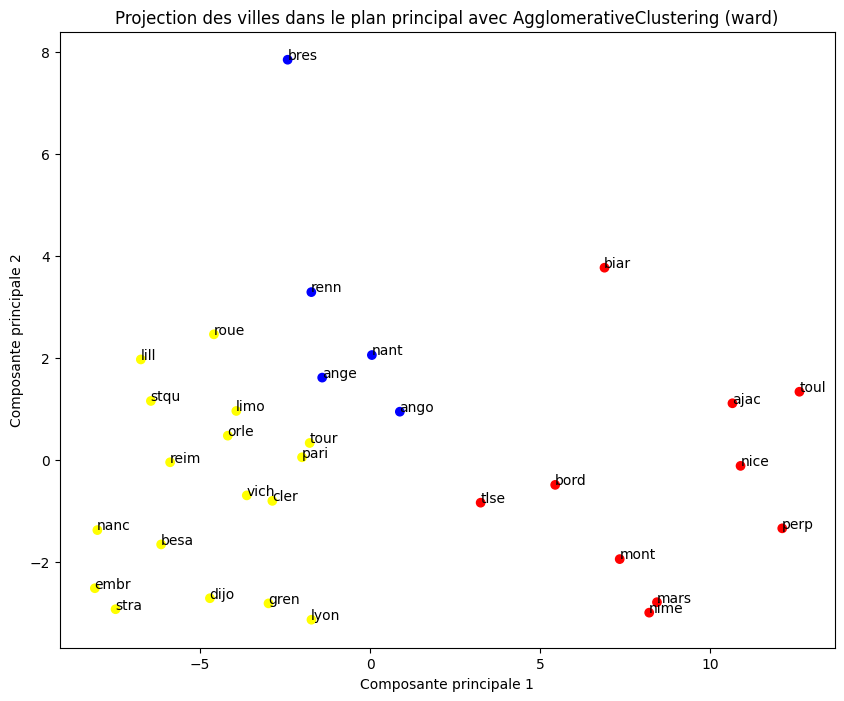

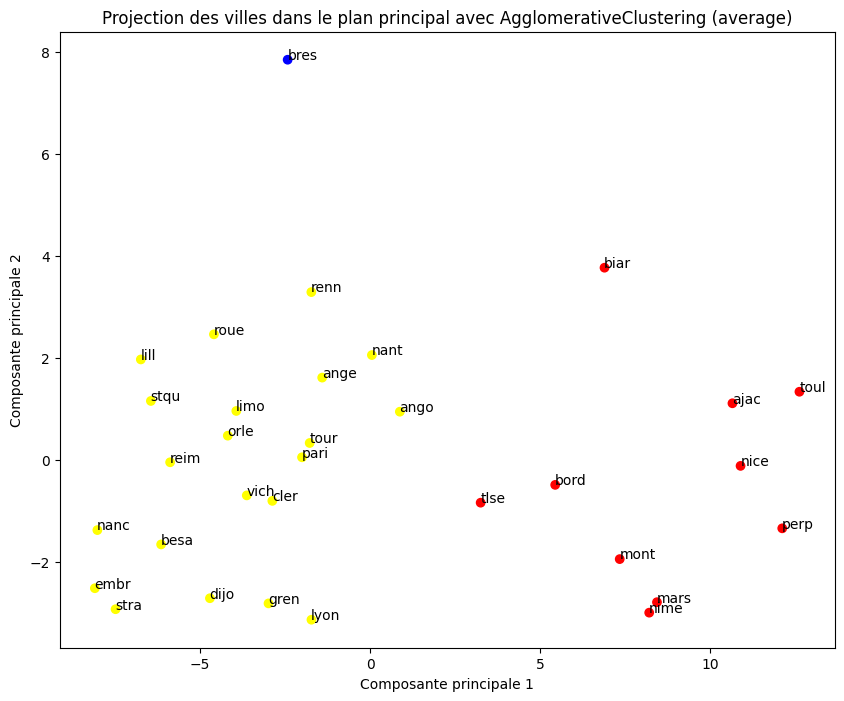

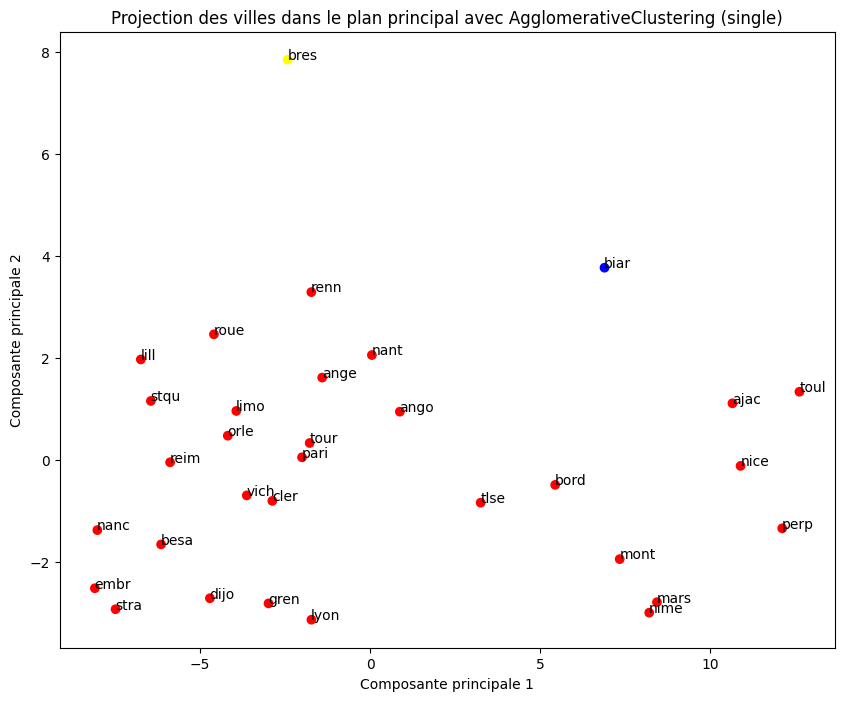

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

# Charger les données à partir du fichier CSV en spécifiant le séparateur comme ";"
data = pd.read_csv('villes.csv', sep=';')

# Sélectionner les températures comme caractéristiques pour le clustering
temperatures = data.drop(columns=["ville"])

# Appliquer l'ACP pour réduire la dimensionnalité
pca = PCA(n_components=2)
X_pca = pca.fit_transform(temperatures)

# Définir les méthodes d'agrégation
methods = ['ward', 'average', 'single']

# Pour chaque méthode, appliquer AgglomerativeClustering avec 3 clusters
for method in methods:
    # Appliquer AgglomerativeClustering avec la méthode spécifiée
    clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels = clustering.fit_predict(X_pca)

    # Définir les couleurs pour les clusters
    colors = ['red', 'yellow', 'blue']

    # Afficher les résultats
    plt.figure(figsize=(10, 8))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap=matplotlib.colors.ListedColormap(colors))

    # Ajouter les noms des villes aux points
    for i, ville in enumerate(data['ville']):
        plt.annotate(ville, xy=(X_pca[i, 0], X_pca[i, 1]), xytext=(-0.2, 0.2), textcoords='offset points')

    plt.xlabel('Composante principale 1')
    plt.ylabel('Composante principale 2')
    plt.title(f'Projection des villes dans le plan principal avec AgglomerativeClustering ({method})')
    plt.show()


Pour déterminer la meilleure partition pour les méthodes KMeans et AgglomerativeClustering en utilisant le critère de l'indice de silhouette, vous pouvez procéder comme suit :

    Appliquer KMeans et AgglomerativeClustering avec différents nombres de clusters (de 2 à 6).
    Calculer l'indice de silhouette pour chaque partition.
    Sélectionner la partition avec l'indice de silhouette le plus élevé.

In [7]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

# Charger les données à partir du fichier CSV en spécifiant le séparateur comme ";"
data = pd.read_csv('villes.csv', sep=';')

# Sélectionner les températures comme caractéristiques pour le clustering
temperatures = data.drop(columns=["ville"])

# Initialiser une liste pour stocker les indices de silhouette pour chaque méthode de clustering
silhouette_scores_kmeans = []
silhouette_scores_agglomerative = []

# Définir les nombres de clusters à tester
n_clusters_range = range(2, 7)

# Appliquer KMeans et AgglomerativeClustering avec différents nombres de clusters
for n_clusters in n_clusters_range:
    # KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(temperatures)
    silhouette_scores_kmeans.append(silhouette_score(temperatures, kmeans_labels))

    # AgglomerativeClustering
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    agglomerative_labels = agglomerative.fit_predict(temperatures)
    silhouette_scores_agglomerative.append(silhouette_score(temperatures, agglomerative_labels))

# Trouver le nombre optimal de clusters pour KMeans
best_kmeans_n_clusters = np.argmax(silhouette_scores_kmeans) + 2  # +2 car on commence à partir de 2 clusters

# Trouver le nombre optimal de clusters pour AgglomerativeClustering
best_agglomerative_n_clusters = np.argmax(silhouette_scores_agglomerative) + 2  # +2 car on commence à partir de 2 clusters

print("Meilleur nombre de clusters pour KMeans:", best_kmeans_n_clusters)
print("Meilleur nombre de clusters pour AgglomerativeClustering:", best_agglomerative_n_clusters)


Meilleur nombre de clusters pour KMeans: 2
Meilleur nombre de clusters pour AgglomerativeClustering: 2




```
Utiliser cet indice dans une boucle de 5 itérations au maximum. Les 5 itérations correspondent aux
5 partitions possibles i.e. en 2, 3, 4, 5 et 6 classes issues de KMeans. Déduire la meilleure partition
qui correspond à **un indice maximal pour l’indice Silhouette`**``



In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Charger les données à partir du fichier CSV en spécifiant le séparateur comme ";"
data = pd.read_csv('villes.csv', sep=';')

# Sélectionner les températures comme caractéristiques pour le clustering
temperatures = data.drop(columns=["ville"])

best_silhouette_score = -1
best_partition = None

# Itérer sur le nombre de clusters de 2 à 6
for n_clusters in range(2, 7):
    # Appliquer KMeans avec le nombre de clusters actuel
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(temperatures)

    # Calculer l'indice de silhouette pour la partition actuelle
    silhouette_avg = silhouette_score(temperatures, kmeans_labels)

    # Mettre à jour la meilleure partition si l'indice de silhouette actuel est meilleur
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_partition = kmeans_labels

print("Meilleure partition avec KMeans (indice de silhouette maximal):", best_partition)


Meilleure partition avec KMeans (indice de silhouette maximal): [1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0]




```
Utiliser cet indice dans une boucle de 5 itérations au maximum. Les 5 itérations correspondent aux
5 partitions possibles i.e. en 2, 3, 4, 5 et 6 classes issues de AgglomerativeClustering (avec à chaque
le critère d’agrégation ward, average et single. Déduire la meilleure partition qui correspond à un
indice maximal pour l’indice Silhouette.```



In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Charger les données à partir du fichier CSV en spécifiant le séparateur comme ";"
data = pd.read_csv('villes.csv', sep=';')

# Sélectionner les températures comme caractéristiques pour le clustering
temperatures = data.drop(columns=["ville"])

best_silhouette_score = -1
best_partition = None

# Itérer sur le nombre de clusters de 2 à 6
for n_clusters in range(2, 7):
    # Appliquer KMeans avec le nombre de clusters actuel
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(temperatures)

    # Calculer l'indice de silhouette pour la partition actuelle
    silhouette_avg = silhouette_score(temperatures, kmeans_labels)

    # Mettre à jour la meilleure partition si l'indice de silhouette actuel est meilleur
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_partition = kmeans_labels

print("Meilleure partition avec KMeans (indice de silhouette maximal):", best_partition)


Meilleure partition avec KMeans (indice de silhouette maximal): [1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0]




```
En considérant 3 clusters, quelle méthode donnera la meilleure partition ?```



Pour déterminer quelle méthode donne la meilleure partition avec 3 clusters, nous allons utiliser à la fois KMeans et AgglomerativeClustering, et comparer les indices de silhouette obtenus pour chaque méthode.

In [10]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Charger les données à partir du fichier CSV en spécifiant le séparateur comme ";"
data = pd.read_csv('villes.csv', sep=';')

# Sélectionner les températures comme caractéristiques pour le clustering
temperatures = data.drop(columns=["ville"])

# Appliquer KMeans avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(temperatures)

# Calculer l'indice de silhouette pour KMeans
silhouette_score_kmeans = silhouette_score(temperatures, kmeans_labels)

# Appliquer AgglomerativeClustering avec 3 clusters et méthode de liaison "ward"
agglomerative_ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
agglomerative_ward_labels = agglomerative_ward.fit_predict(temperatures)

# Calculer l'indice de silhouette pour AgglomerativeClustering avec méthode "ward"
silhouette_score_agglomerative_ward = silhouette_score(temperatures, agglomerative_ward_labels)

# Appliquer AgglomerativeClustering avec 3 clusters et méthode de liaison "average"
agglomerative_average = AgglomerativeClustering(n_clusters=3, linkage='average')
agglomerative_average_labels = agglomerative_average.fit_predict(temperatures)

# Calculer l'indice de silhouette pour AgglomerativeClustering avec méthode "average"
silhouette_score_agglomerative_average = silhouette_score(temperatures, agglomerative_average_labels)

# Appliquer AgglomerativeClustering avec 3 clusters et méthode de liaison "single"
agglomerative_single = AgglomerativeClustering(n_clusters=3, linkage='single')
agglomerative_single_labels = agglomerative_single.fit_predict(temperatures)

# Calculer l'indice de silhouette pour AgglomerativeClustering avec méthode "single"
silhouette_score_agglomerative_single = silhouette_score(temperatures, agglomerative_single_labels)

# Comparer les indices de silhouette et déterminer la méthode avec le meilleur score
best_method = None
best_silhouette_score = -1

if silhouette_score_kmeans > best_silhouette_score:
    best_method = "KMeans"
    best_silhouette_score = silhouette_score_kmeans

if silhouette_score_agglomerative_ward > best_silhouette_score:
    best_method = "AgglomerativeClustering (ward)"
    best_silhouette_score = silhouette_score_agglomerative_ward

if silhouette_score_agglomerative_average > best_silhouette_score:
    best_method = "AgglomerativeClustering (average)"
    best_silhouette_score = silhouette_score_agglomerative_average

if silhouette_score_agglomerative_single > best_silhouette_score:
    best_method = "AgglomerativeClustering (single)"
    best_silhouette_score = silhouette_score_agglomerative_single

print("La meilleure méthode avec 3 clusters est:", best_method)
print("Indice de silhouette correspondant:", best_silhouette_score)


La meilleure méthode avec 3 clusters est: AgglomerativeClustering (average)
Indice de silhouette correspondant: 0.4917281366704161


Avantages des méthodes de classification hiérarchique (AgglomerativeClustering) :

    Interprétabilité : Les résultats de la classification hiérarchique peuvent être représentés sous forme d'un dendrogramme, ce qui permet une visualisation intuitive de la structure hiérarchique des données.
    Flexibilité : Il est possible d'obtenir un nombre variable de clusters en coupant le dendrogramme à différents niveaux, ce qui offre une flexibilité dans l'analyse des données.
    Pas besoin de spécifier le nombre de clusters : Contrairement à KMeans, AgglomerativeClustering n'exige pas de spécifier le nombre de clusters à l'avance, ce qui peut être un avantage lorsque le nombre de clusters n'est pas connu à l'avance ou lorsque les données sont naturellement hiérarchiques.

Inconvénients des méthodes de classification hiérarchique (AgglomerativeClustering) :

    Complexité : Les algorithmes de classification hiérarchique peuvent être plus complexes en termes de calculs et de temps d'exécution, surtout pour de grandes quantités de données.
    Sensibilité aux bruits : Les méthodes de classification hiérarchique peuvent être sensibles aux bruits et aux valeurs aberrantes, ce qui peut affecter la qualité des clusters.

Avantages des méthodes de partitionnement (KMeans) :

    Efficacité : KMeans est souvent plus rapide et plus efficace que les méthodes de classification hiérarchique, en particulier pour de grandes quantités de données.
    Facilité d'utilisation : Il est relativement simple à mettre en œuvre et à comprendre, ce qui le rend accessible même aux débutants.
    Capacité à gérer de grandes quantités de données : KMeans peut être plus performant sur de grands ensembles de données en raison de sa complexité computationnelle moindre par rapport aux méthodes hiérarchiques.

Inconvénients des méthodes de partitionnement (KMeans) :

    Sensibilité au nombre de clusters : KMeans exige que le nombre de clusters soit spécifié à l'avance, ce qui peut être un inconvénient lorsque ce nombre n'est pas connu a priori.
    Sensibilité à l'initialisation : Les performances de KMeans peuvent dépendre de l'initialisation aléatoire des centroïdes, ce qui signifie qu'il peut converger vers différents résultats en fonction de l'initialisation.
    Sensible aux formes non convexes : KMeans fonctionne mieux avec des clusters de formes convexes et peut avoir du mal à détecter des clusters de formes complexes ou non convexes.

Proposer dans une fonction une éventuelle approche permettant de combiner les points forts des
méthodes hiérarchiques et des méthodes de partitionnement : on appelle une telle approche
mixte ou hybride. Proposer une visualisation du nuage des villes et comparer les résultats obtenus
avec ceux des questions précédentes.

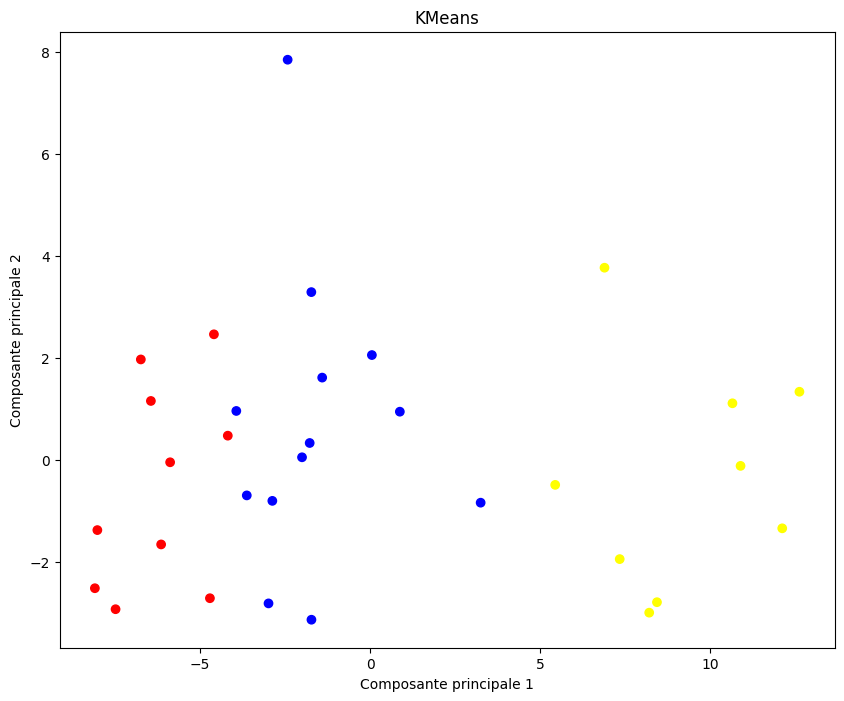

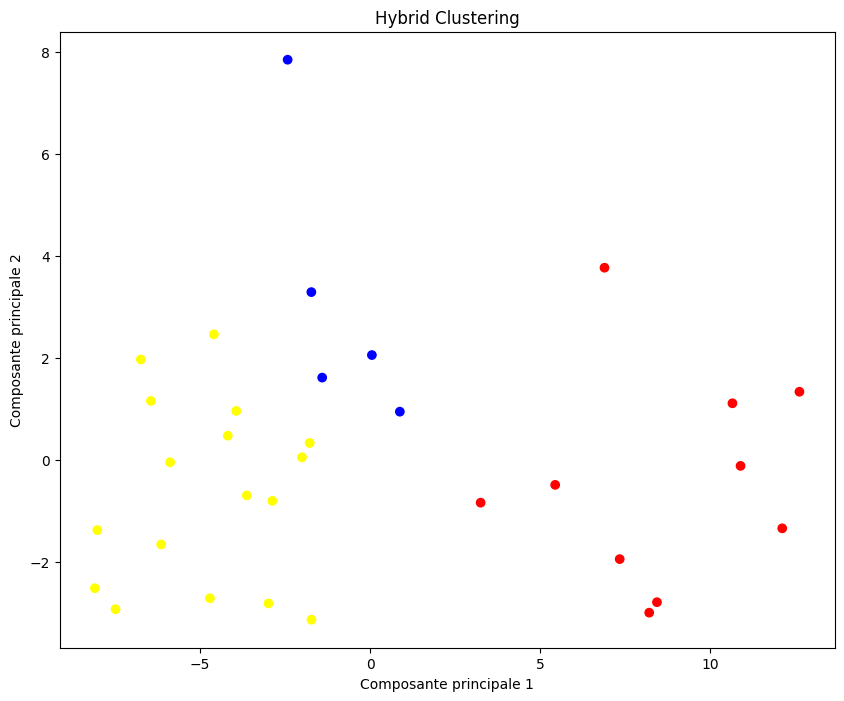

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

def hybrid_clustering(data, n_clusters, linkage='ward'):
    # Sélectionner les températures comme caractéristiques pour le clustering
    temperatures = data.drop(columns=["ville"])

    # Appliquer KMeans pour initialiser les centroïdes
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(temperatures)

    # Utiliser les centroïdes de KMeans comme points de départ pour AgglomerativeClustering
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    hybrid_labels = clustering.fit_predict(temperatures)

    return kmeans_labels, hybrid_labels


def visualize_clusters(X_pca, labels, title):
    colors = ['red', 'yellow', 'blue']
    plt.figure(figsize=(10, 8))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap=matplotlib.colors.ListedColormap(colors))
    plt.xlabel('Composante principale 1')
    plt.ylabel('Composante principale 2')
    plt.title(title)
    plt.show()

# Charger les données à partir du fichier CSV en spécifiant le séparateur comme ";"
data = pd.read_csv('villes.csv', sep=';')

# Réaliser une Analyse en Composantes Principales (ACP) pour réduire la dimensionnalité
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data.drop(columns=["ville"]))

# Nombre de clusters
n_clusters = 3

# Appliquer l'approche hybride
kmeans_labels, hybrid_labels = hybrid_clustering(data, n_clusters)

# Visualiser les résultats
visualize_clusters(X_pca, kmeans_labels, 'KMeans')
visualize_clusters(X_pca, hybrid_labels, 'Hybrid Clustering')


Clustering pour wdbc.csv :
Silhouette Score: 0.3151862330494096


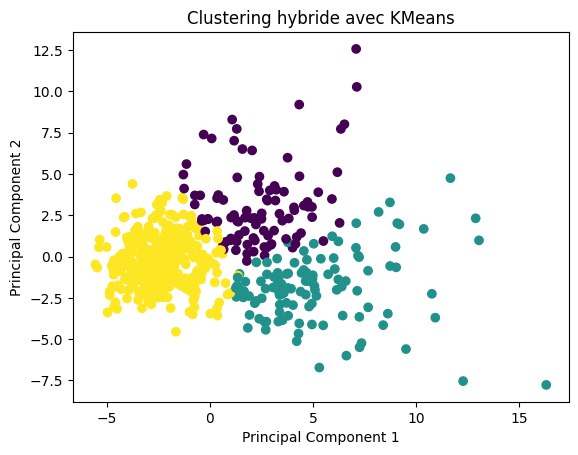


Clustering pour spamb.csv :
Silhouette Score: 0.1260820649083139


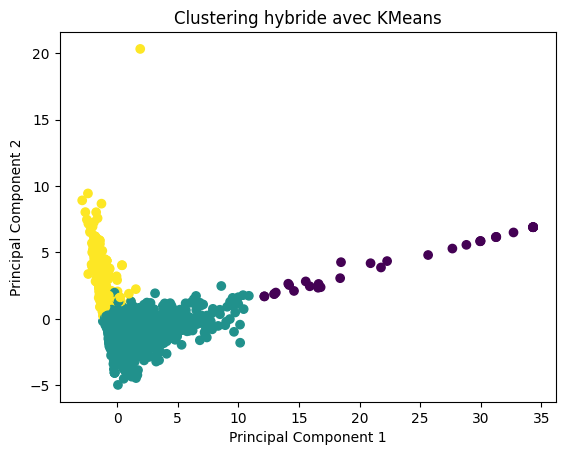

In [13]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Fonction de clustering hybride
def hybrid_clustering(data, n_clusters):
    # Standardiser les données
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    # Réduction de dimensions avec PCA
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data_scaled)
    
    # Clustering avec KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data_scaled)
    labels = kmeans.labels_
    
    # Score silhouette
    silhouette_avg = silhouette_score(data_scaled, labels)
    print("Silhouette Score:", silhouette_avg)
    
    # Visualisation des clusters
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
    plt.title("Clustering hybride avec KMeans")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

# Charger les jeux de données
wdbc_data = pd.read_csv('wdbc.csv', header=None, delimiter=';')
spamb_data = pd.read_csv('spamb.csv', header=None, delimiter=';')

# Appliquer le clustering hybride
print("Clustering pour wdbc.csv :")
hybrid_clustering(wdbc_data, n_clusters=3)

print("\nClustering pour spamb.csv :")
hybrid_clustering(spamb_data, n_clusters=3)